In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import *

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df = df[['sepal_length','petal_length','species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

log = LogisticRegression(multi_class='multinomial')


log.fit(X_train,y_train)


y_pred = log.predict(X_test)

print(f'Accuracy of LogisticRegression : {accuracy_score(y_test,y_pred)}')


Accuracy of LogisticRegression : 0.9666666666666667


In [9]:
print(f'confusion_matrix of LogisticRegression : \n {confusion_matrix(y_test,y_pred)}')


confusion_matrix of LogisticRegression : 
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


In [10]:
print('confusion_matrix of LogisticRegression : ')
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=[0,1,2])


confusion_matrix of LogisticRegression : 


,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [11]:
# prediction

query = np.array([[3.4,2.7]])
log.predict_proba(query)

C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [12]:
log.predict(query)

C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


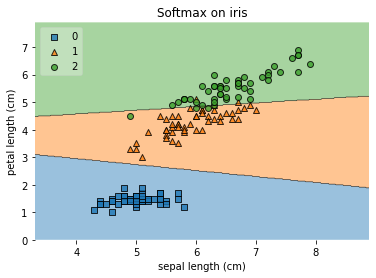

In [13]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values,log,legend=2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Softmax on iris')
plt.show()